<a href="https://colab.research.google.com/github/EbsHirani/DogsVsCats/blob/master/DogsVsCats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
!pip install -q kaggle

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import os
os.listdir('/content')

['.config', 'sample_data']

In [0]:
!mkdir .kaggle
!mkdir ~/.kaggle
# uploaded = files.upload()


In [0]:
import json
token = {"username":"ebshirani","key":"20110d86c501857a2c403a40f9850658"}#key hidden
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json


In [6]:
!kaggle config set -n path -v{/content}


- path is now set to: {/content}


In [0]:
!chmod 600 /root/.kaggle/kaggle.json


In [8]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 99% 537M/544M [00:09<00:00, 113MB/s] 
100% 544M/544M [00:09<00:00, 62.8MB/s]
 95% 258M/271M [00:01<00:00, 159MB/s]
100% 271M/271M [00:01<00:00, 148MB/s]
  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 112MB/s]


In [9]:
import os
print(os.listdir('/content/{/content}/competitions/dogs-vs-cats-redux-kernels-edition/'))
os.chdir('/content/{/content}/competitions/dogs-vs-cats-redux-kernels-edition/')

['sample_submission.csv', 'test.zip', 'train.zip']


In [0]:
!unzip \*.zip


In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , Lambda, Flatten
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.optimizers import Adam ,RMSprop
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from keras import  backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical


from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization, Convolution2D , MaxPooling2D, Activation

Using TensorFlow backend.


In [12]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import os
trainset = ['train/'+i for i in os.listdir('train')]
testset = ['test/'+i for i in os.listdir('test')]
label = []
for i in os.listdir('train'):
   lab = i.split('.')[0]
   if (lab == 'dog'):
     label.append(1)
   else:
     label.append(0)
# train = np.concatenate(trainset,np.array(label))
# train
#train = pd.DataFrame({'img':trainset,'label':label})
#img = [cv2.resize(cv2.imread(i, cv2.IMREAD_COLOR),64,64).T for i in train['img']]
def read_image(file_path):
    img = img_to_array(load_img(file_path,target_size = (64,64)))

    return img
def prep_data(images):
    count = len(images)
    data = np.ndarray((count, 64, 64,3), dtype=np.float32)

    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image
    return data
train = prep_data(trainset)
test = prep_data(testset)
print(train.shape)


(25000, 64, 64, 3)


(64, 64, 3)
<class 'numpy.ndarray'>


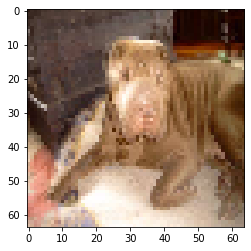

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import ticker
import seaborn as sns
%matplotlib inline 

# im1 = array_to_img(train[0])
# im2 = array_to_img(train[1])
print(train[0].shape)
print(type(train[5]))
plt.imshow(train[5]/255)
plt.show()



In [0]:
def standardise(x):
   return (x-train.mean())/train.std()

In [0]:
model = Sequential([
    Lambda(standardise,input_shape=(64,64,3)),
    Dropout(0.2),
    Convolution2D(32,(3,3), activation = 'relu'),
    BatchNormalization(axis = 3),
    Convolution2D(32,(3,3),activation = 'relu'),
    MaxPooling2D(data_format='channels_last'),
    BatchNormalization(axis = 3),
    Convolution2D(64,(3,3),activation = 'relu'),
    BatchNormalization(axis=3),
    Convolution2D(64,(3,3),activation = 'relu'),
    MaxPooling2D(data_format='channels_last'),
    Convolution2D(128,(3,3),activation='relu'),
    #MaxPooling2D(data_format='channels_last'),
    BatchNormalization(axis = 3),
    Convolution2D(128,(3,3),activation='relu'),
    #MaxPooling2D(data_format='channels_last'),
    BatchNormalization(axis = 3),
    Convolution2D(256,(3,3),activation='relu'),
    #MaxPooling2D(data_format='channels_last'),
    BatchNormalization(axis = 3),
    Convolution2D(256,(3,3),activation='relu'),
    #MaxPooling2D(data_format='channels_last'),
    Flatten(),
    BatchNormalization(),
    Dense(512,activation = 'relu'),
    BatchNormalization(),
    Dense(256,activation = 'relu'),
    BatchNormalization(),
    
    Dense(1, activation = 'sigmoid'),
])
model.compile(Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model.optimizer.lr=0.05




In [0]:
from sklearn.model_selection import train_test_split
gen = ImageDataGenerator()
x = train
y = label 
xtrain,xval, ytrain, yval = train_test_split(train, label,test_size = 0.10, random_state = 42)
batches=gen.flow(xtrain,ytrain,batch_size = 16)
valbatches = gen.flow(xval,yval,batch_size = 16)

In [0]:
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=10, validation_data=valbatches, validation_steps=valbatches.n,callbacks=[EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')])

In [0]:
predictions = model.predict(test,verbose=0)

In [20]:
pred = [predictions[i][0] for i in range(0,len(test))]
pred

[1.0,
 0.9995318,
 0.68131,
 0.9977374,
 0.00036680698,
 0.036175936,
 0.0,
 0.99999857,
 0.00025087595,
 0.022510827,
 3.1292439e-06,
 0.0233289,
 0.010632575,
 1.0,
 1.6540289e-05,
 0.999998,
 0.8851152,
 0.018076211,
 0.00023770332,
 0.98607403,
 0.13870823,
 0.9822618,
 0.017066687,
 0.9972402,
 4.6491623e-05,
 0.008709669,
 0.99805343,
 0.4413652,
 6.854534e-07,
 1.013279e-06,
 1.1622906e-06,
 0.0046181083,
 1.0,
 0.0,
 5.927682e-05,
 1.0,
 2.9802322e-06,
 0.0006183088,
 1.0,
 7.367134e-05,
 0.00027912855,
 0.9973945,
 0.0050385,
 0.00044581294,
 0.99215484,
 0.0001733005,
 4.0978193e-05,
 0.98836094,
 0.0,
 0.04126355,
 0.9994409,
 0.99883795,
 1.0,
 0.96875733,
 0.9376757,
 0.0,
 0.46769792,
 0.0,
 1.013279e-06,
 0.0,
 0.9881634,
 1.7225742e-05,
 0.9999302,
 0.64063084,
 0.0,
 0.94495976,
 0.21665466,
 2.115965e-06,
 0.92501533,
 0.9564823,
 0.63195527,
 0.0056339204,
 0.9999989,
 0.0,
 0.00021982193,
 0.98418236,
 0.99403644,
 0.0033466816,
 3.46601e-05,
 0.99969757,
 0.9992981

In [21]:
count = range(1,len(test)+1)
sub = pd.DataFrame({'id':count,'label':pred})
print(sub)
sub.to_csv('dogsvcats.csv',index = False)

          id     label
0          1  1.000000
1          2  0.999532
2          3  0.681310
3          4  0.997737
4          5  0.000367
...      ...       ...
12495  12496  0.000003
12496  12497  0.000000
12497  12498  0.011921
12498  12499  0.999985
12499  12500  0.999746

[12500 rows x 2 columns]


3.1292439e-06


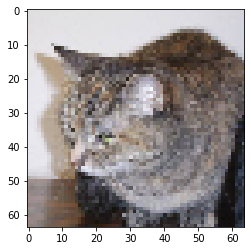

In [22]:
plt.imshow(test[10]/255)
print(pred[10])
plt.show()